# Don't be confused:

- The newton's method is only one. It is used to find the root of a function. Which means to find the x_root which satisfies f(x)=0.
  BUT IN OPTIMIZATION THIS METHOD CAN BE USED TO FIND THE EXTREMA: it is simply applied to find the root of f'(x)=0. You'll see that the newton method computes the derivative of the function of which is computing the x_root. SO IN OPTIMIZATION PROBLEMS IT MEANS THAT IS NEEDED THE DERIVATIVE OF f'(x), which means that it's needed f''(x). That's why it is a second order method.(this can be a problem because in the multivariate case we must compute Hessian, which takes times).

- Newton method can be seen as something which exploits the method of linear approximation of a function. That's why we'll discuss also it.



# Linear approximation
https://www.youtube.com/watch?v=U0xlKuFqCuI

Newton's method is a root finding method (roots= are the x for which f(x) = 0) that uses linear approximations of the function.
So before talking about Newton's method let's see what is a linear approximation:

The idea is simply this: approximate a function around a point "a", with the tangent line to the curve in that point. It's interesting where this idea comes from, and how to obtain the equation of the tangent line:

Suppose you want to know the value of a function f(x) WHERE X IS A POINT BELONGING TO THE NEIGHBOURHOOD OF a (the closer the better the approx). Suppose that you also know/ can easily compute f'(a) and f(a). So the idea is this: we exploit the definition of limit:

$$ f'(a) =  \lim_{x\to a} \frac{f(x) - f(a)}{x-a} $$

So this is an equivalence if x is really really close to a. If we remove the limit is not anymore an equivalence but an approximation ( the more x is close to a, the better the approximation). So we can say:

$$ f'(a) \approx \frac{f(x) - f(a)}{x-a} $$

From this we can obtain what we care about: the approximation of f(x) in a neighbourhood of x=a:

$$ f(x)  \approx f(a)+ f'(a)(x-a) $$

Why is it called linear approximation? because if you think about it f(x) has been approximated with a line! To be more precise it is the line tangent to the function in a! So obviously the more the function is complex, the more this approximation is going to be a good approximation for a smaller neighbourhood. Note that x is the point in which you want to have the approximation, while a is the point in which you have knowledge about the function! More clear in the example.

# example:
Let's do an example which apparently is not about linear approximation:
find the square root of a number. (This problem can be solved also by using Newton's method.)

For instance: find the value of $\sqrt{9.06}$. 
By using linear approximation:

 We are looking for this: $ f(x)  \approx f(a)+ f'(a)(x-a) $, where x=9.06 in this case! What is a? We must choose him. It's better if it has these properties: 
    - close to x.
    - easy to compute f(a) and f'(a).
  What is f? it is the square root in this case. So we want "a" such that $\sqrt{a}$ it's easy to compute and close to 9.06. We can use a=9. So we know that f(a) =3. While $f'(x) = \frac{1}{2 \sqrt{9}}$. So we solved the problem:
  $$ f(9.06) = 3 + \frac{1}{2 \sqrt{9}} (9.06 - 9) = 3.01 $$
  
  (Note: from another point of view we computed that $f'(a) = \frac{1}{6}$ and we used this info by doing linear approximation to infere from f(x)-f(a) = 0.6 that x-a = 0.1! So x = a + 0.1 ).
  
NOTE THAT LINEAR APPROXIMATION IS EXACTLY LIKE THE TAYLOR APPROXIMATION STOPPING AT THE FIRST ORDER TERM!!!!
  
  
Let's see the code of this exercise solution. But in order to show visibly the difference between the approximation of f(X) and f(X) let's choose a value of X and "a" not so close.


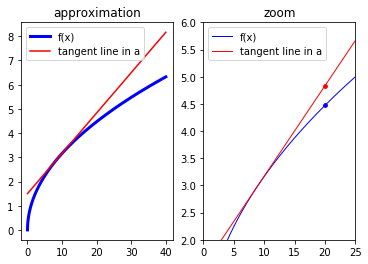

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# our aim is to approximate the value of f(X) = sqrt(X) so:

a = 9
X = 20
f_a = 3  # f(a)
f_d_a= 1/6  # f'(a)

x = np.arange(0,X*2,0.001)
y_sqrt = x**(1/2)
y_approx = f_a  + (f_d_a)*(x-a)


######################################################
# plot of the solution:

fig, ax = plt.subplots(1,2);
ax[0].plot(x,y_sqrt, "-b", label="f(x)",linewidth=3);
ax[0].plot(x,y_approx,"-r", label="tangent line in a"); # = approximation of f(x) around a.
ax[0].legend(loc="upper left")
ax[0].set_title('approximation')


ax[1].plot(x,y_sqrt, "-b", label="f(x)", linewidth=1);
ax[1].plot(x,y_approx,"-r", label="tangent line in a", linewidth=1); # = approximation of f(x) around a.
ax[1].legend(loc="upper left")
ax[1].set_xlim([0, X+5])
ax[1].set_ylim([2,6])
ax[1].set_title("zoom")
ax[1].scatter(X, f_a + f_d_a*(X-a),c="r",s=14); # plot of f(X)_approx
ax[1].scatter(X, X**(1/2), c='b',s=14 ); # plot of sqrt(X)

# Newton's method FOR FINDING ROOTS
There are two methods, both called Newton's methods, but one is for finding roots and one is for optimization problems. Let's discuss first the one for finding roots.
It uses recursively the idea of linear approximation, to find the root of a function, so the solution of the equation f(x) = 0. So the result will be a certain x_root. (Instead linear approximation aim was just to approximate f(x)).
The idea is this:
As for linear approximation we said that

$$ f'(a) =  \lim_{x\to a} \frac{f(x) - f(a)}{x-a} $$

So this is an equivalence if x is really really close to a. If we remove the limit is not anymore an equivalence but an approximation ( the more x is close to a, the better the approximation). So we can say:

$$ f'(a) \approx \frac{f(x) - f(a)}{x-a} $$

Now there's the difference wrt linear approximation: We want x, and we impose that f(x) = 0. So:

$$ x_{root} = a - \frac{f(a)}{f'(a)} $$

Note that what we're doing can be also seen from another point of view: We are approximating the root of f(x) with the root of the line which is tangent to f(x) in a. This is actually a better way to reason about it because this can help us to solve this issue:

What should i use as "a"? We know that the approximation of the solution is good if "a" is close to x_root. But we don't know x_root. So what can we do? We can use a random value of "a". Then we must check if the x_root computed, that we call now x_1, makes f(x_1) close to zero. If it is not the case we repeat the computation but this time we need a value of "a" which is closer to x_root. Well if you look this gif you can see that if we choose a=x_1, then "a" now is closer to x_root. So we iterate this process.
<img src= "NewtonIteration_Ani.gif">
(in the gif x_5 is the x_root we were looking for). Note that from another point of view this is similar to gradient descent but the difference is this: we don't have to fix a step, it is estabilished by the computation itself. The direction anyway is not the same of the gradient descent. Usually newton is faster to converge, but each step is more costly.

So the process can be generalized in this way:
$${\displaystyle x_{n+1}=x_{n}-{\frac {f(x_{n})}{f'(x_{n})}}.}$$

When do we stop? We need a/some stopping rule/s. For example:

- maximum number of iterations
- $f(x_i)$ < error
- $ ||x_i+1 - x_i||$ < eps
- $f'(x) < $ eps


ADVANTAGES:

- WHEN IT CONVERGES IT IS FAST: The convergence is quadratic: as the method converges on the root, the difference between the root and the approximation is squared (the number of accurate digits roughly doubles) at each step. 


DISADVANTAGES:
- IT IS NOT GUARANTEED TO CONVERGE (THERE'S A PROOF OF CONVERGENCE, BUT IT S TRUE ONLY IF SOME CONDITIONS ARE SATISFIED. THE CONDITIONS ARE THESE:
   - f ′(x) ≠ 0; for all x ∈ I, where I is the interval [x_root − r, x_root + r] for some r ≥ |x_root − x0|;
   - f ″(x) is continuous, for all x ∈ I;
   - x0 sufficiently close to the root x_root.
   
   Which means that the function must not have stationary point within the interval of radious given by the difference of x_root and the point in which we're doing the computation of the tangent. In the same interval the function must have a second derivative continious. The third condition is something more complex to be explained.
   
- Newton's method requires that the derivative can be calculated directly. An analytical expression for the derivative may not be easily obtainable or could be expensive to evaluate. In these situations, it may be appropriate to approximate the derivative by using the slope of a line through two nearby points on the function. Using this approximation would result in something like the secant method whose convergence is slower than that of Newton's method.

- THE SOLUTION DEPENDS ON THE STARTING POINT. (try in the next example to use a starting point a=-1 (which will converge to x_root=-3) and a=1 (which will converge to x_root=3).

# NEWTON'S METHOD FOR OPTIMIZATION PROBLEMS
It actually is the application of the newton's method for finding the root, but applied to the derivative of the function of interest! And we know that newton's method computes the derivative of the function of interest, so if we're applying it to the derivative, we'll need to compute the second derivative. So we actually don't need a further explanation.
Just some notes:

- the solution can be a minimum, a maximum, a saddle point.
- the expression of computing the root of f'(x) to find the minimum of f(x) with newton's method is simply this:
$${\displaystyle x_{k+1}=x_{k}-{\frac {f'(x_{k})}{f''(x_{k})}}} $$
  


# example for finding the root of a function.
To make things a little bit more complicated let's solve again the problem solved before with linear approximation: compute the $\sqrt{9.06}$.

  We must transform the problem in order to have an equation. 
  Easy: we are looking for x s.t.  $$x^2 - 9.06 = 0$$
  So Newton tells us to solve the problem by doing this iteratively:  $$ x = a - \frac{f(a)}{f'(a)} $$
 
https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/newton/
  


Found solution after 4 iterations.
The function has value 0.0005754403289959242 in 3.0100789757627617


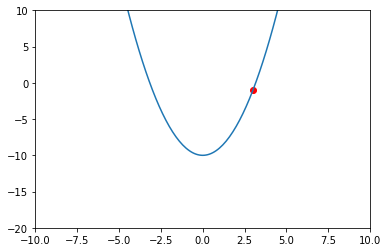

In [13]:
 # Newton's method 
import numpy as np
import matplotlib.pyplot as plt

def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None


f = lambda x: x**2 - 9.06
Df = lambda x: 2*x 
x0=1
epsilon=0.01
max_iter=100

x_root = newton(f,Df,x0,epsilon,max_iter)
print("The function has value {} in {}".format(f(x_root),x_root))

x = np.arange(-10,10,0.1)
y =  x**2 - 10

plt.plot(x,y)
plt.ylim(-20, 10)
plt.xlim(-10,10)


plt.scatter(x_root, x_root**2 -10,c='r');

# don't be confused: this example is to show how Newton's method can be used to find the root of an equation/function, not to
# do optimization.

# example for finding the critical point of a function

Found solution after 1 iterations.
the critical point computed by newton's method is: 0.0


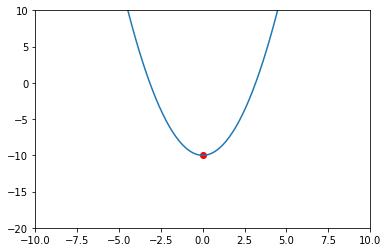

In [12]:
# the only differences are the inputs to the newton functions: instead of f and f' are f' and f''.
# newton's method for optimization

def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None


f = lambda x: x**2 - 10
Df = lambda x: 2*x 
DDf = lambda x: 2
x0=1
epsilon=0.01
max_iter=100
critical_point =newton(Df,DDf,x0,epsilon,max_iter)
print( "the critical point computed by newton's method is: {}".format(critical_point) )

import numpy as np
x = np.arange(-10,10,0.1)
y =  x**2 - 10
plt.plot(x,y);
plt.ylim(-20,10)
plt.xlim(-10,10)
plt.scatter(critical_point,critical_point**2 -10, c="r");

# the critical_point of f computed with newton's method is an inflection point.

# Example of newton method converging to an inflection point

Found solution after 3 iterations.
the critical point computed by newton's method is: 0.5773809523809523


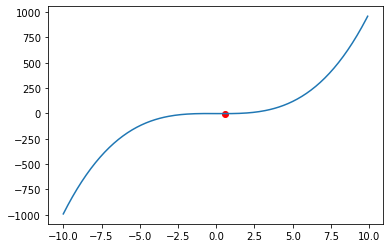

In [4]:
# newton's method for optimization


def newton(f,Df,x0,epsilon,max_iter):
    xn = x0
    for n in range(0,max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Found solution after',n,'iterations.')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Zero derivative. No solution found.')
            return None
        xn = xn - fxn/Dfxn
    print('Exceeded maximum iterations. No solution found.')
    return None



Df = lambda x: 3*x**2 - 1
DDf = lambda x: 6*x
x0=1
epsilon=0.01
max_iter=100
critical_point =newton(Df,DDf,x0,epsilon,max_iter)
print( "the critical point computed by newton's method is: {}".format(critical_point) )

import numpy as np
x = np.arange(-10,10,0.1)
y = x**3 - x- 1
plt.plot(x,y);
plt.scatter(critical_point,critical_point**3 - critical_point - 1, c="r");

# the critical_point of f computed with newton's method is an inflection point.

# NEWTON'S METHOD MULTIVARIATE CASE
IT IS GIVEN BY THIS FORMULA:
    $${\displaystyle x_{k+1}=x_{k}- H(x_{k})^{-1}\nabla(x_{k})}$$
    
Two main things:

1) It is too costly to compute the Hessian matrix for the learning of NN, because are involved too many derivatives. That's why we don't care that much about the implementation of this method.

2) there are clever ways to compute this trating it as a linear sys, or computing approximations of H.

3) Newton is faster to converge wrt the gradient descent usually:

<img src="gradient_descent_vs_newton.png">
A comparison of gradient descent (green) and Newton's method (red) for minimizing a function (with small step sizes). Newton's method uses curvature information (i.e. the second derivative) to take a more direct route.